In [1]:
%cd ../..

/root/capsule/code


In [2]:
import pandas as pd

from pipeline import experiment, lab, foraging_analysis
import datajoint as dj
%matplotlib inline

Connecting hanhou@datajoint.mesoscale-activity-map.org:3306


## Basic queries of behavior

Add one column of `water_restriction_number` to `experiment.Session` for readability

In [3]:
session_with_h2o_id = experiment.Session * lab.WaterRestriction.proj('water_restriction_number')

All 2-lickport foraging sessions (Janelia and Allen)

In [15]:
all_foraging_sessions = session_with_h2o_id & (experiment.BehaviorTrial & 'task_protocol IN (100, 110, 120)')
(dj.U('water_restriction_number') & all_foraging_sessions).fetch()

array([('HC16',), ('FOR12',), ('FOR11',), ('FOR02',), ('FOR04',),
       ('FOR03',), ('FOR01',), ('FOR05',), ('FOR06',), ('FOR07',),
       ('FOR08',), ('FOR09',), ('FOR10',), ('FOR13',), ('FOR14',),
       ('FOR20',), ('FOR19',), ('HH07',), ('HH01',), ('HH06',), ('HH08',),
       ('HH09',), ('HH04',), ('HH11',), ('HH12',), ('HH13',), ('HH10',),
       ('HH14',), ('HH15',), ('HH16',), ('HH17',), ('HH18',), ('HH19',),
       ('HH20',), ('KH_FB12',), ('KH_FB10',), ('KH_FB17',), ('KH_FB18',),
       ('KH_FB19',), ('KH_FB15',), ('KH_FB8',), ('KH_FB9',), ('KH_FB13',),
       ('KH_FB14',), ('KH_FB22',), ('KH_FB20',), ('KH_FB23',),
       ('KH_FB24',), ('KH_FB27',), ('KH_FB26',), ('KH_FB28',),
       ('KH_FB29',), ('KH_FB30',), ('KH_FB31',), ('KH_FB32',),
       ('KH_FB33',), ('KH_FB34',), ('KH_FB36',), ('KH_FB42',),
       ('KH_FB40',), ('KH_FB41',), ('KH_FB37',), ('KH_FB38',),
       ('KH_FB39',), ('KH_FB43',), ('KH_FB44',), ('KH_FB45',),
       ('KH_FB46',), ('KH_FB48',), ('KH_FB49',), ('K

All foraging sessions in Allen

In [7]:
allen_foraging_sessions =  all_foraging_sessions & 'rig LIKE "AIND%"'
allen_foraging_sessions

subject_id institution 6 digit animal ID,session session number,session_date,session_time,username,rig,water_restriction_number WR number
609367,1,2022-03-08,10:00:53,Lucas,AIND-Tower-1,HH19
609367,2,2022-03-09,9:30:15,Lucas,AIND-Tower-1,HH19
609367,3,2022-03-10,9:51:20,Lucas,AIND-Tower-1,HH19
609367,4,2022-03-11,10:58:59,Lucas,AIND-Tower-1,HH19
609367,5,2022-03-14,11:18:25,Lucas,AIND-Tower-1,HH19
609367,6,2022-03-15,10:07:14,Lucas,AIND-Tower-1,HH19
609367,7,2022-03-16,10:23:36,Kenta,AIND-Tower-1,HH19
609367,8,2022-03-17,9:51:48,Kenta,AIND-Tower-1,HH19
609367,9,2022-03-21,11:12:52,Lucas,AIND-Tower-1,HH19
609367,10,2022-03-22,10:31:57,Lucas,AIND-Tower-1,HH19


All sessions from Linda's mice

In [18]:
sessions_with_linda_mice = all_foraging_sessions & 'water_restriction_number LIKE "LA%"'
sessions_with_linda_mice

subject_id institution 6 digit animal ID,session session number,session_date,session_time,username,rig,water_restriction_number WR number
647286,1,2023-01-30,13:23:32,Linda,AIND-Tower-1,LA30
647286,2,2023-01-31,13:43:11,Linda,AIND-Tower-1,LA30
647286,3,2023-02-01,12:28:12,Linda,AIND-Tower-1,LA30
647286,4,2023-02-02,12:31:17,Linda,AIND-Tower-1,LA30
647286,5,2023-02-03,13:28:24,Linda,AIND-Tower-1,LA30
647286,6,2023-02-06,12:01:18,Linda,AIND-Tower-1,LA30
647286,7,2023-02-07,12:23:35,Linda,AIND-Tower-1,LA30
647286,8,2023-02-08,13:23:49,Linda,AIND-Tower-1,LA30
647286,9,2023-02-09,12:34:41,Linda,AIND-Tower-1,LA30
647286,10,2023-02-10,11:56:25,Linda,AIND-Tower-1,LA30


For each mouse, count the total number of sessions, and show the first and the last `session_date`

In [19]:
summary = dj.U('water_restriction_number').aggr(sessions_with_linda_mice, total_sessions='COUNT(*)', first_date='MIN(session_date)', last_date='MAX(session_date)')
summary.fetch(order_by='first_date', format="frame")

,total_sessions,first_date,last_date
water_restriction_number,,,
LA30,11,2023-01-30,2023-02-13
LA31,11,2023-01-30,2023-02-13
LA32,11,2023-01-30,2023-02-13
LA33,11,2023-01-30,2023-02-13
LA34,11,2023-01-30,2023-02-13
LA35,11,2023-01-30,2023-02-13


## Plot training summary

The last figure is more useful. Will turn these summary plots into interactive plots in the future.

/root/capsule/code/pipeline/plot/foraging_plot.py:705: RuntimeWarning: Mean of empty slice
  this_h_matching_bias_mean = np.nanmean(this_h_all_matching_bias, axis=1)
/opt/conda/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


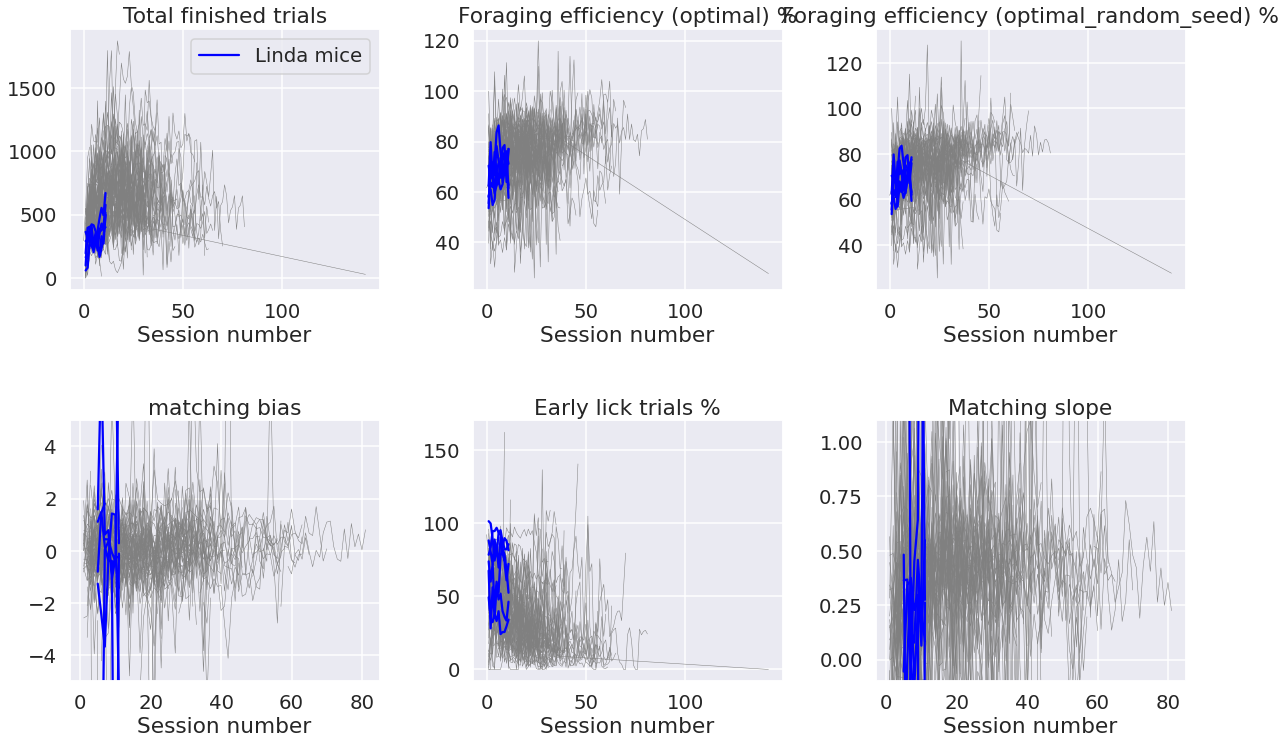

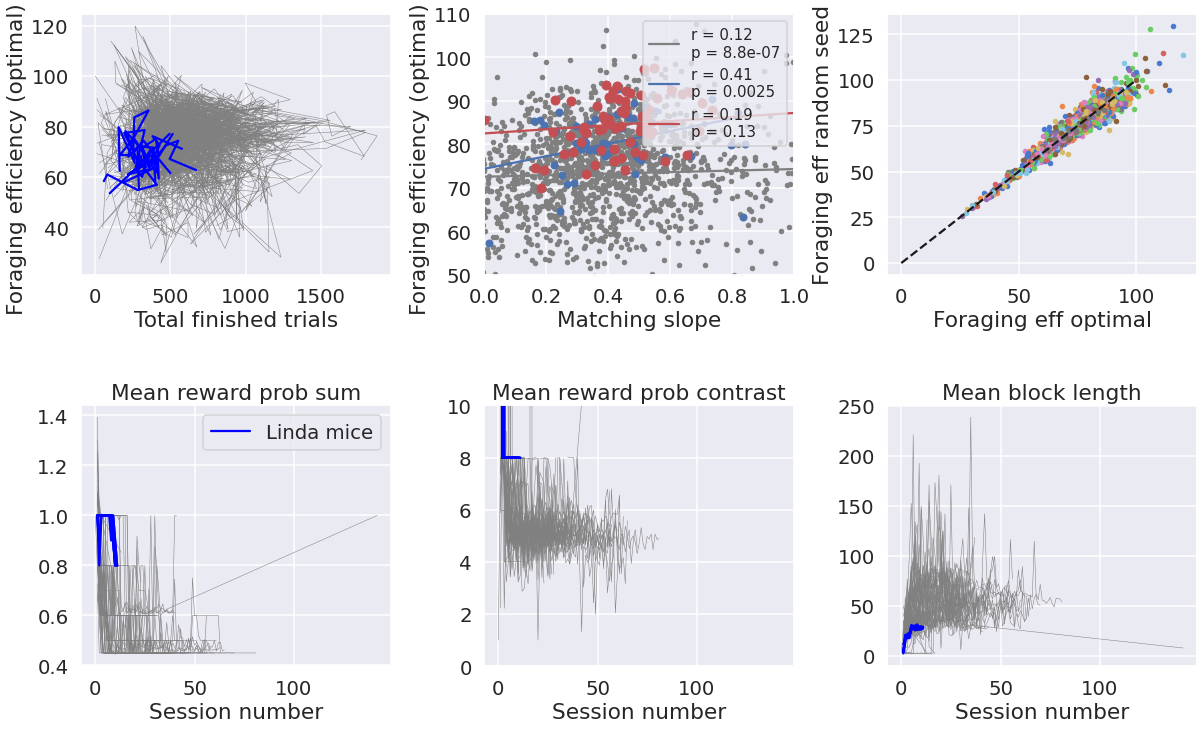

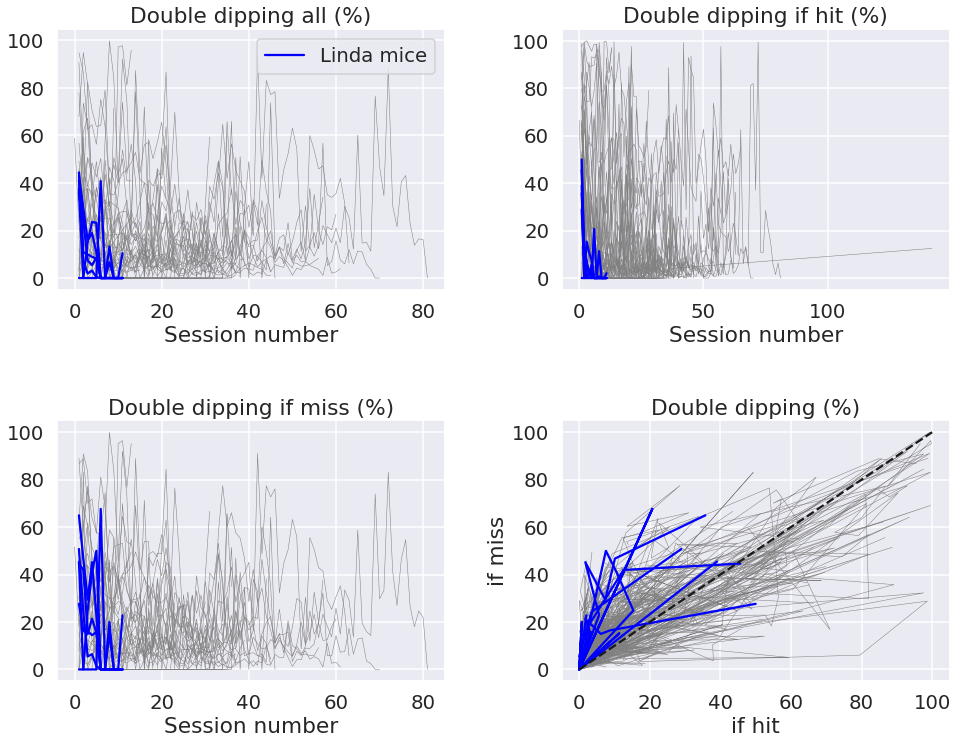

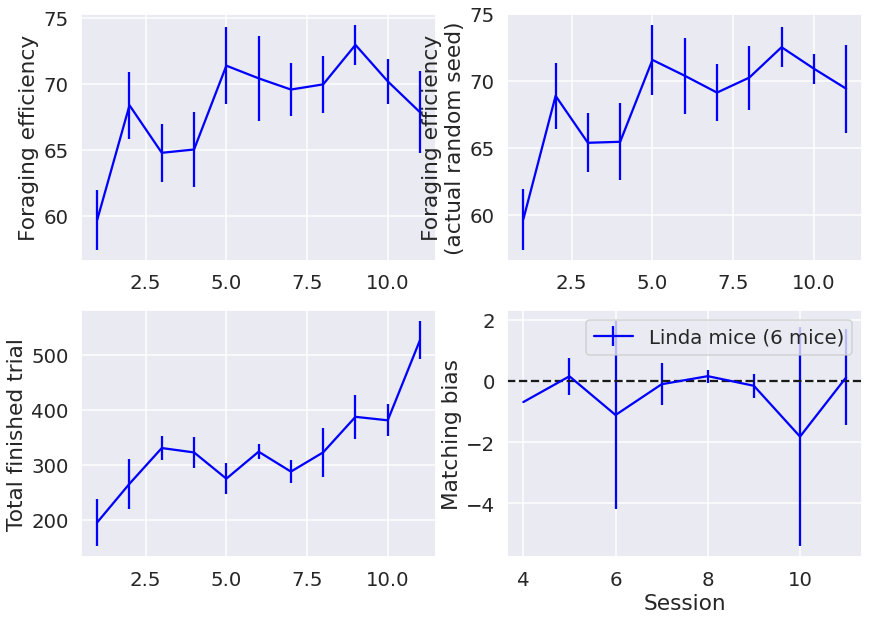

In [35]:
from pipeline.plot import foraging_plot
foraging_plot.plot_training_summary(highlight={tuple(summary.fetch('water_restriction_number')): dict(color='blue', label='Linda mice')})

Plot session with model fitting results (showing the best two and the worst models)

<AxesSubplot: xlabel='Original trial number'>

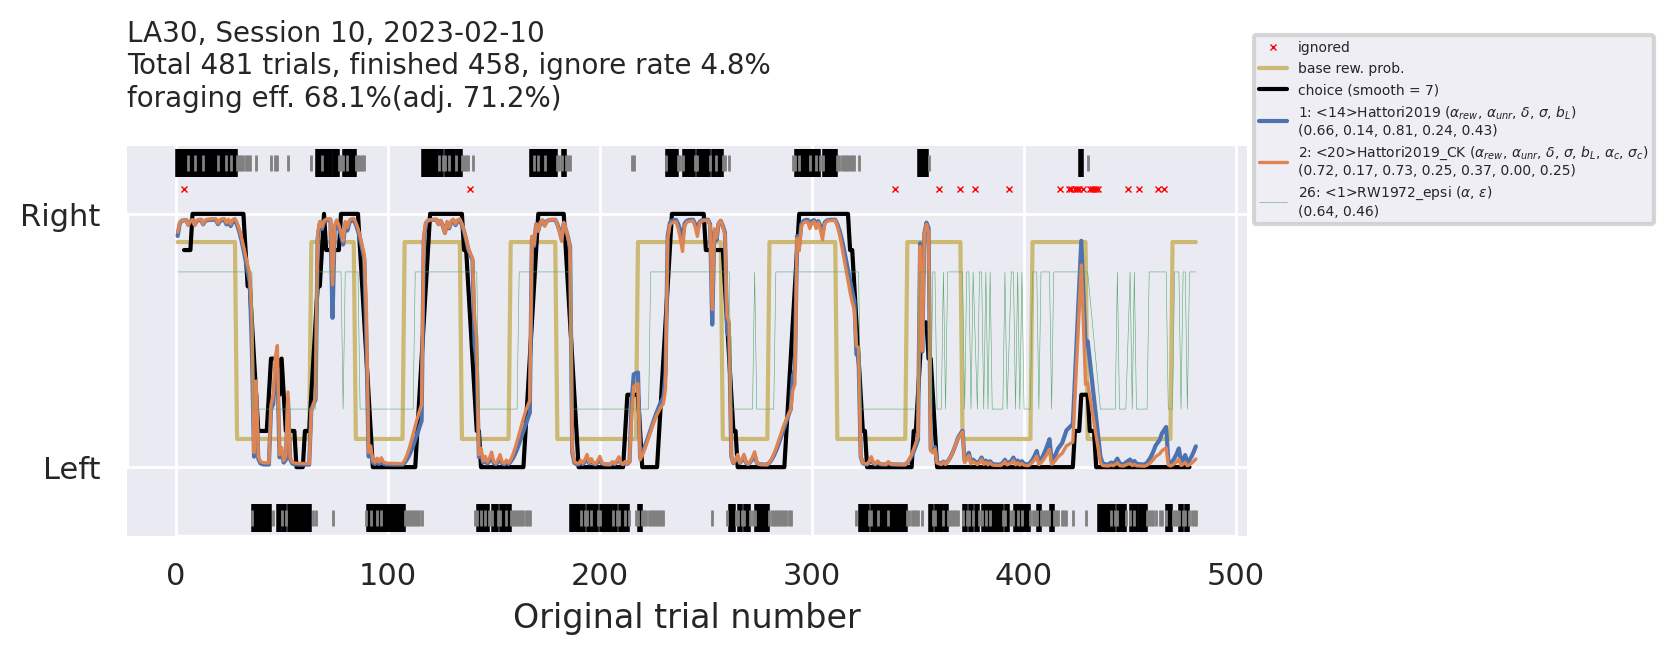

In [34]:
from pipeline.plot.foraging_model_plot import plot_session_model_comparison, plot_session_fitted_choice, _get_model_comparison_results

session_key = {'subject_id': 647286, 'session': 10}
plot_session_fitted_choice(session_key, first_n=2, last_n=1, smooth_factor=7, remove_ignored=False)

Plot modeling fitting results across sessions of this mouse

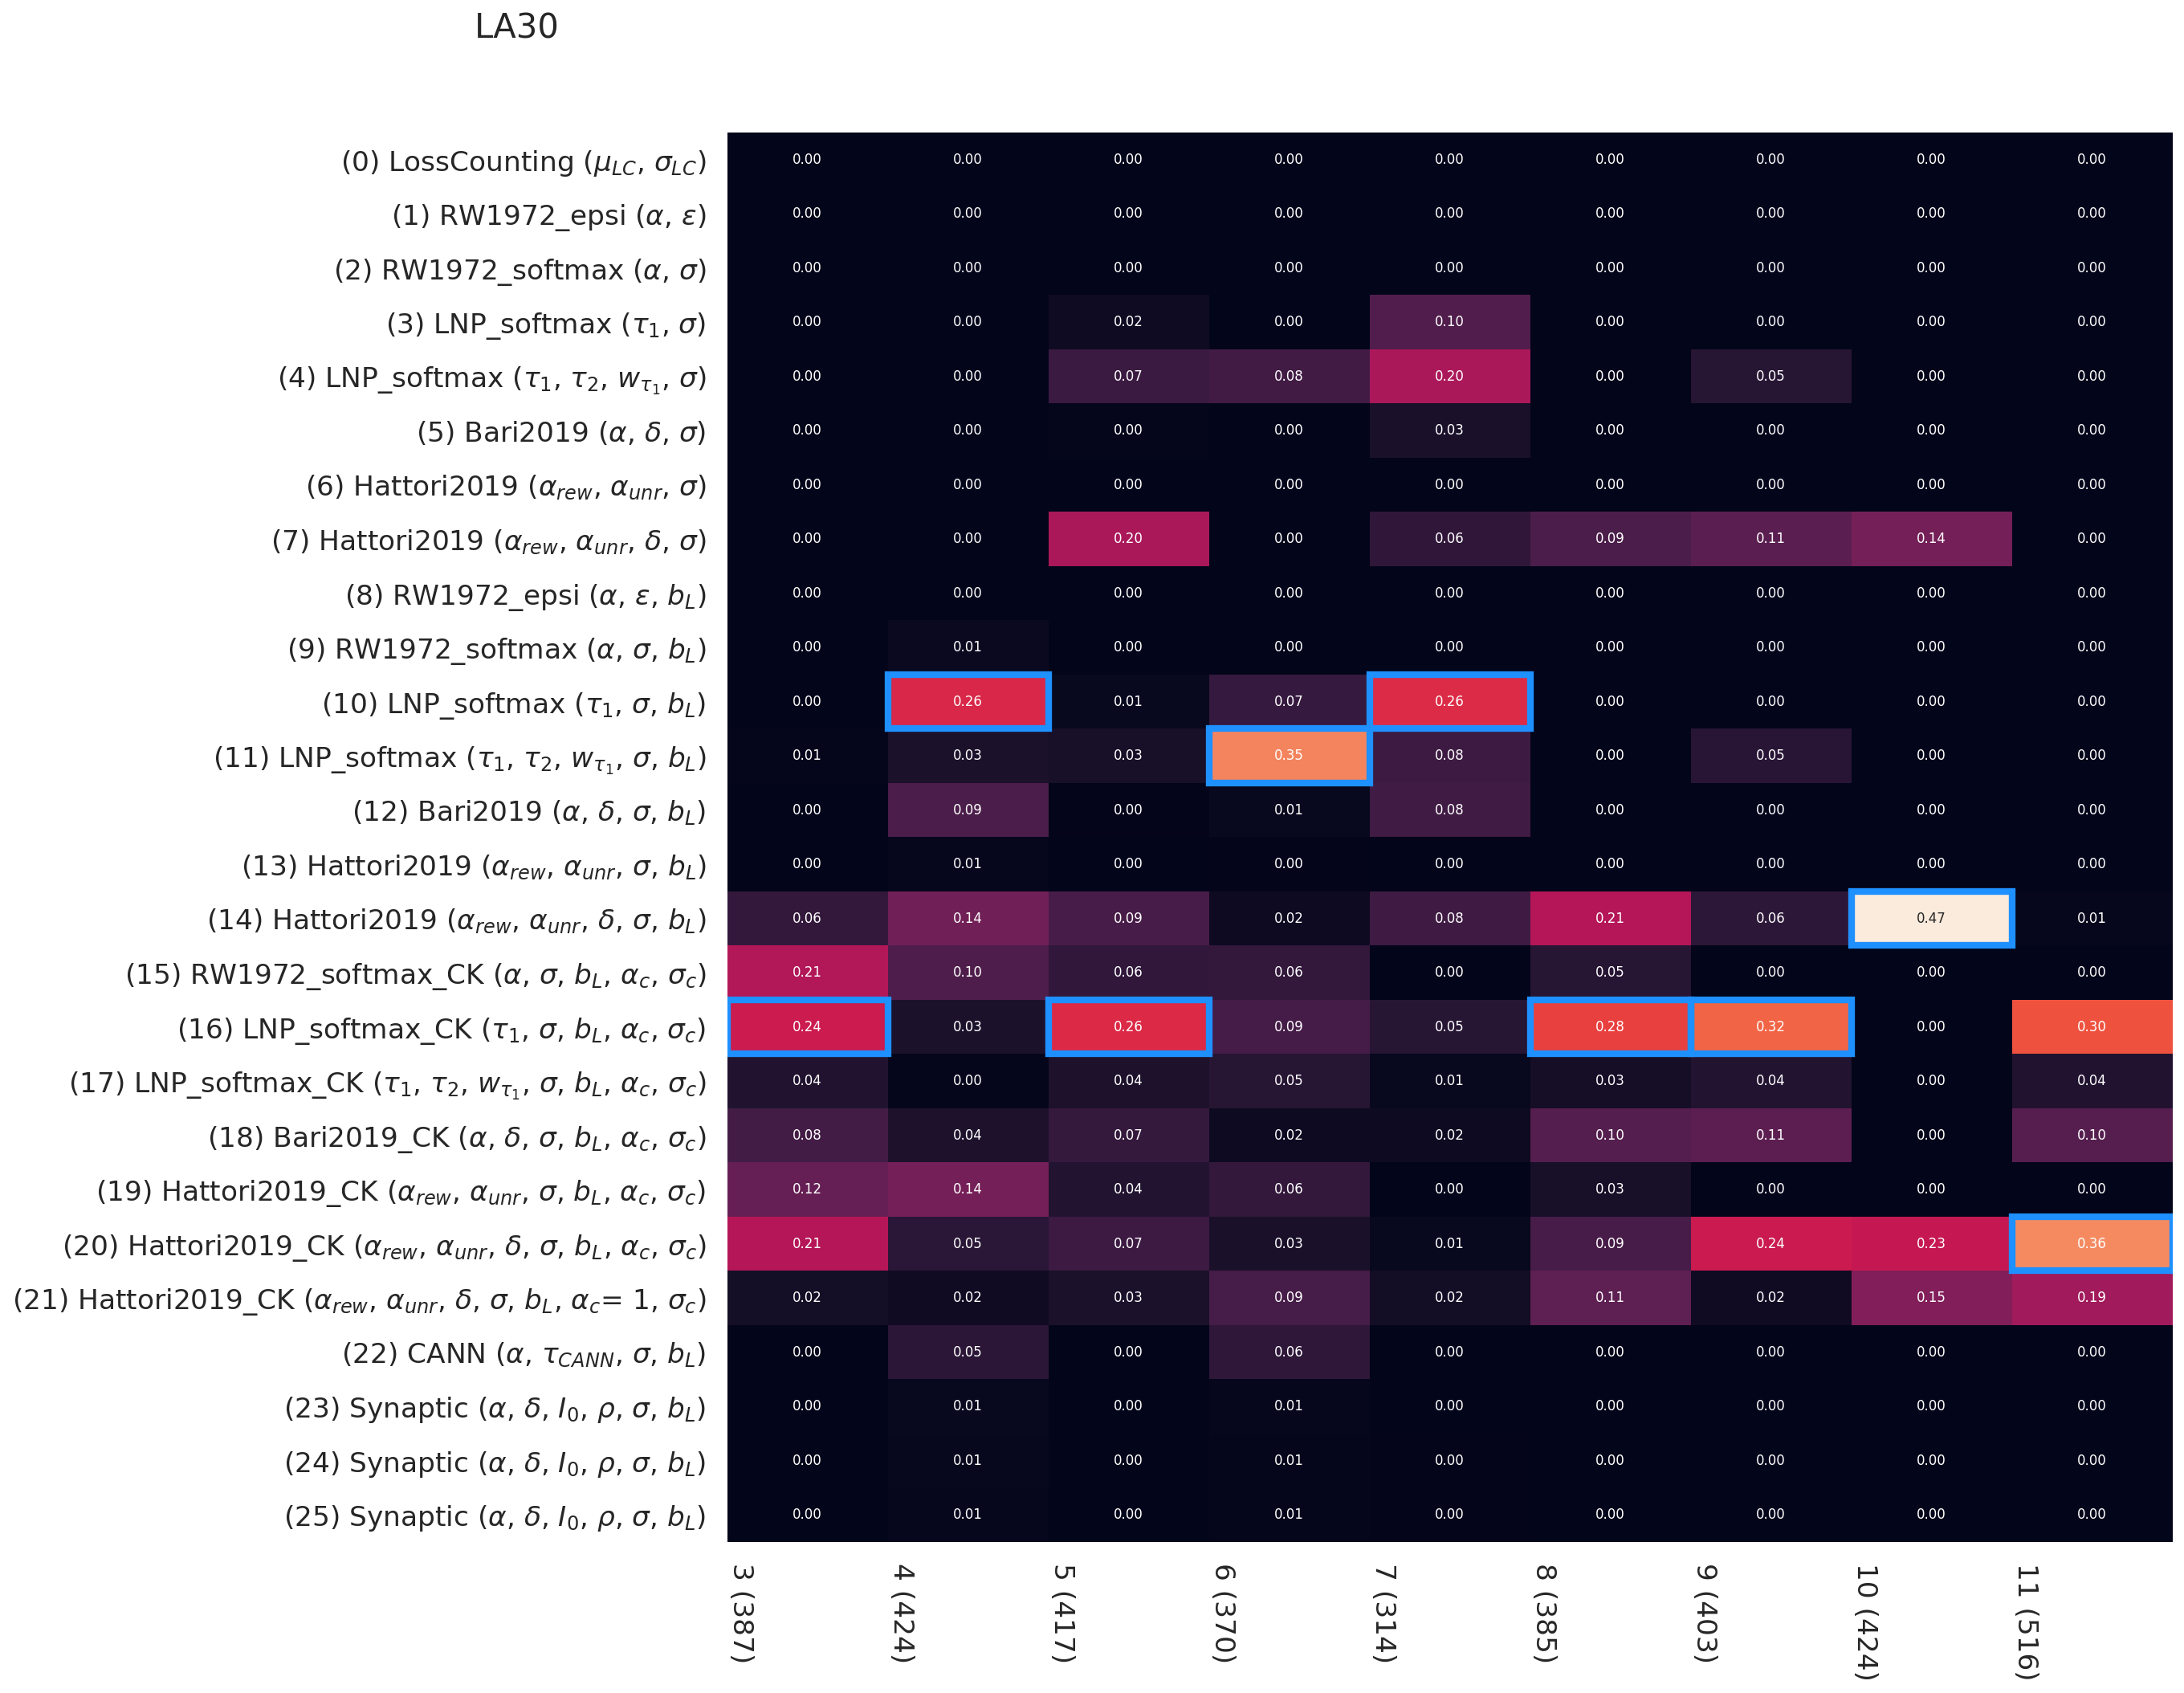

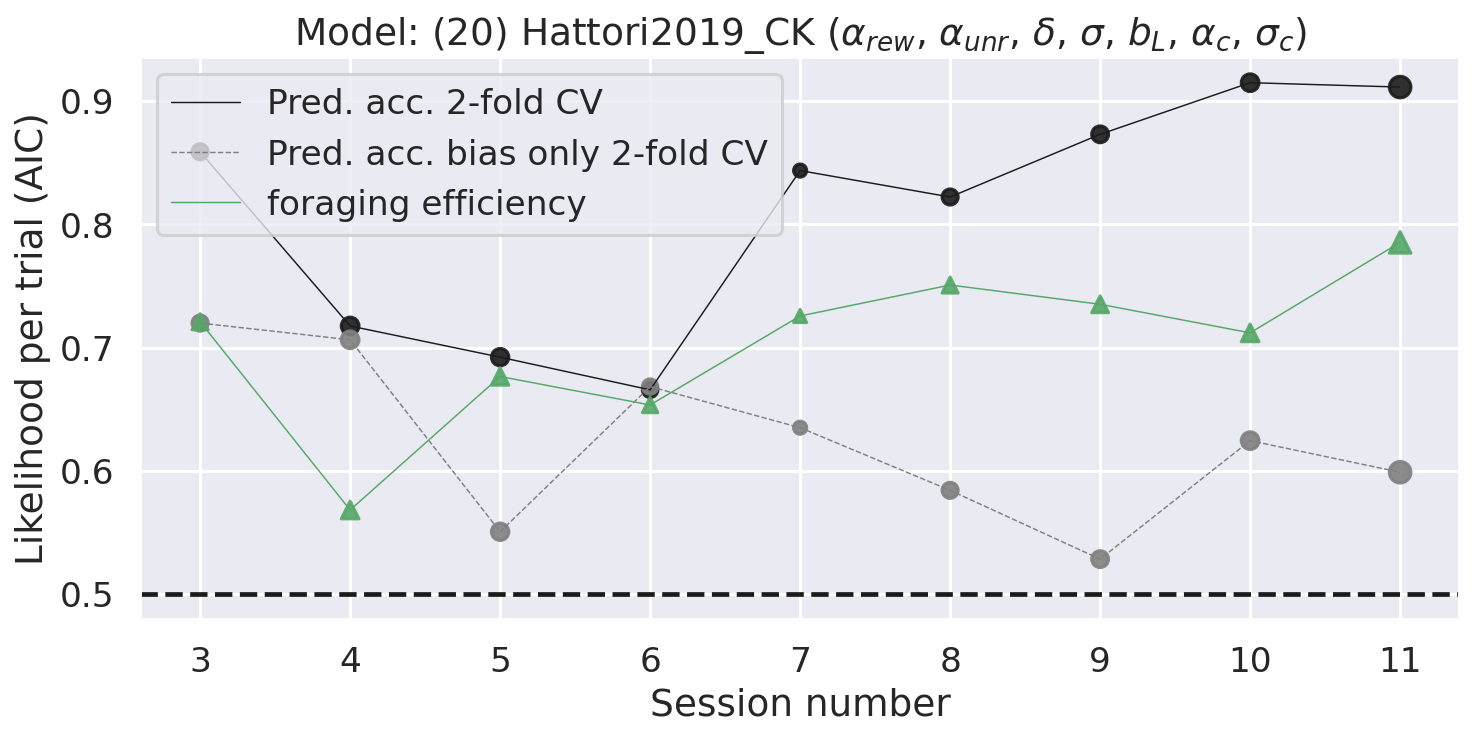

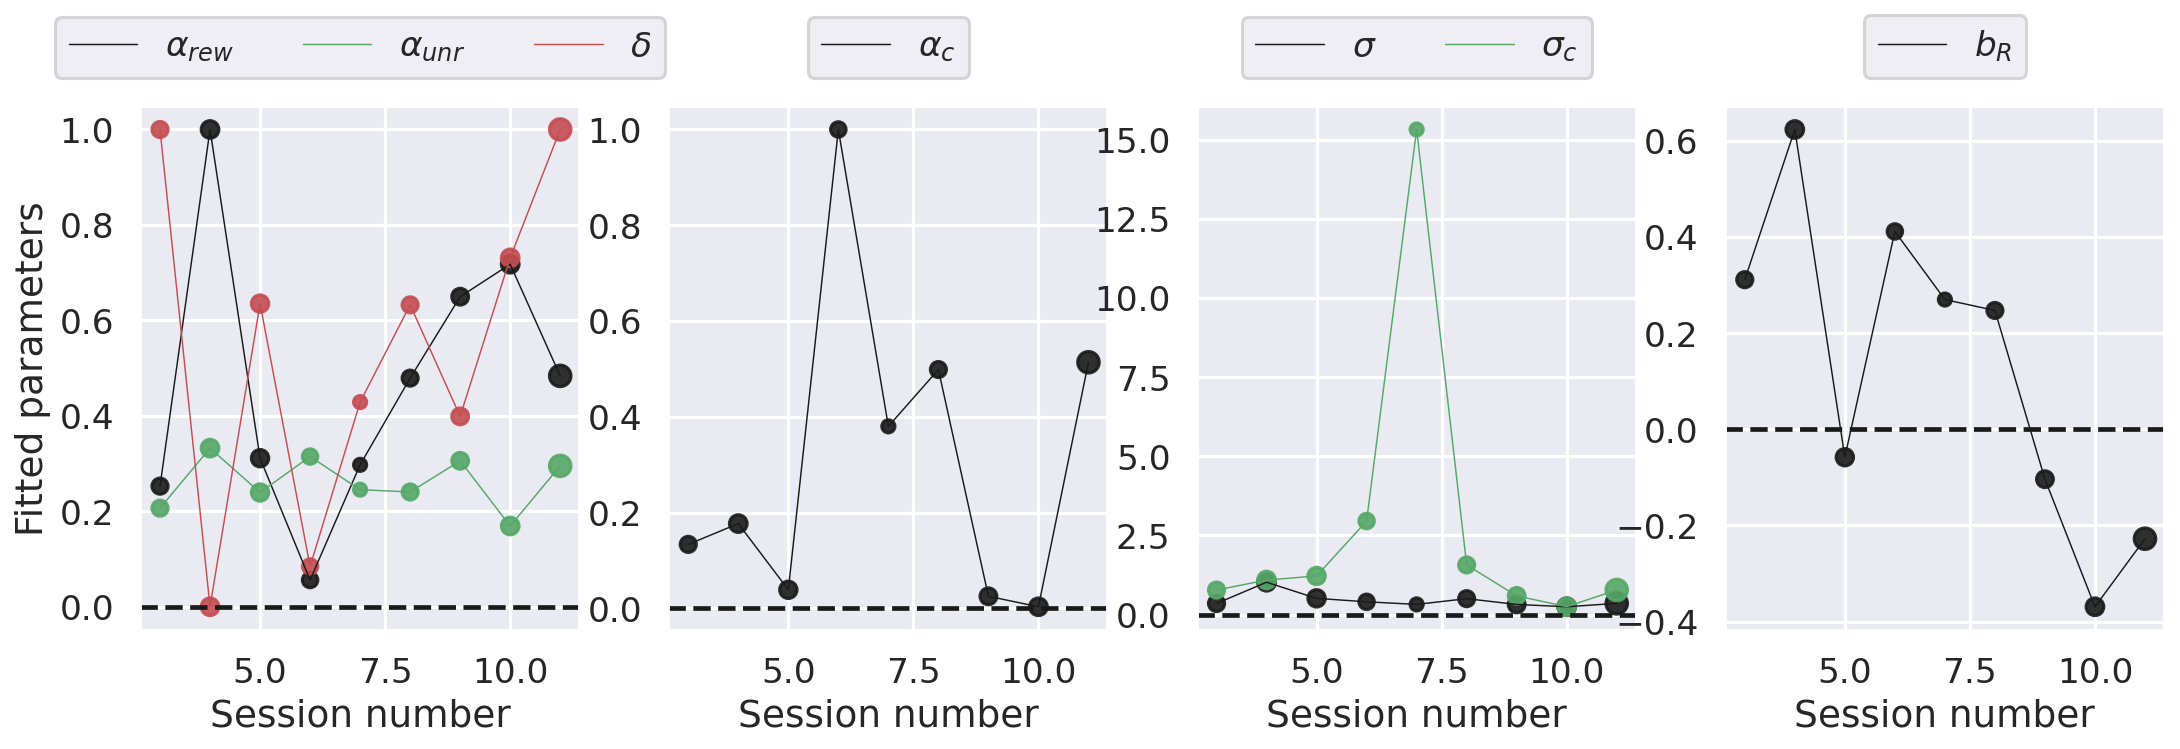

In [36]:
from pipeline.plot.foraging_model_plot import plot_mouse_fitting_results

plot_mouse_fitting_results(subject_id = 647286, model_to_plot_history=20,   # Hattori 2019 with choice kernel
                           para_to_plot_group=[['learn_rate_rew', 'learn_rate_unrew', 'forget_rate'],
                                               ['choice_step_size'],
                                               ['softmax_temperature', 'choice_softmax_temperature'],
                                               ['biasR']]);

## Get raw choice and reward history

In [3]:
from pipeline.foraging_model import get_session_history
from pipeline.plot import foraging_model_plot

session_key = {'subject_id': 647286, 'session': 10}

(<Figure size 1600x600 with 1 Axes>, <AxesSubplot: >)

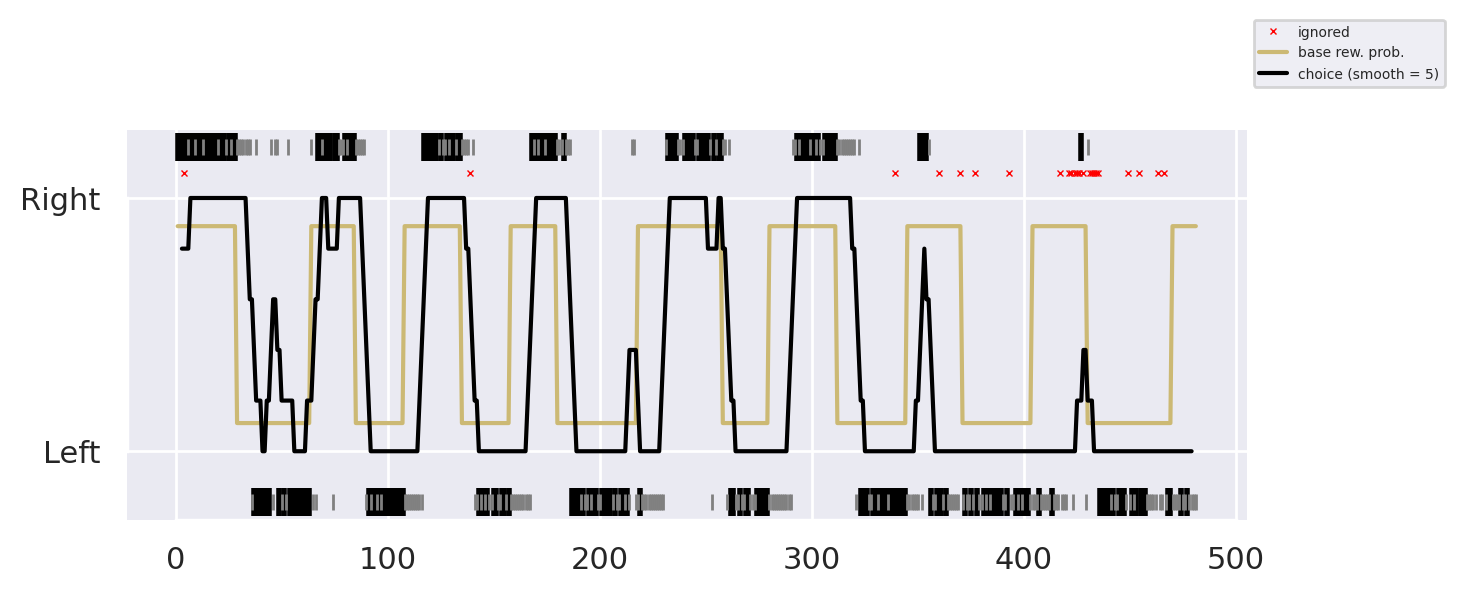

In [47]:
choice_history, reward_history, _ , p_reward, _ = get_session_history(session_key, remove_ignored=False)
foraging_model_plot.plot_session_lightweight([choice_history, reward_history, p_reward]) 

`choice_history`: 0 = left; 1 = right; nan = ignored

In [50]:
choice_history.shape

(1, 481)

`reward_history`: 2 * trial_num array. Separate for left ([0, :]) and right ([1, :]) port

In [56]:
reward_history.shape

(2, 481)

## Get raw events

`TrialEvent` table

In [6]:
trial_events = pd.DataFrame((experiment.TrialEvent & session_key).fetch())
trial_events

,subject_id,session,trial,trial_event_id,trial_event_type,trial_event_time,duration
0,647286,10,1,0,videostart,0.1499,3.7617
1,647286,10,1,1,bitcodestart,3.9116,0.0200
2,647286,10,1,2,delay,4.3318,0.9199
3,647286,10,1,3,delay,7.2517,0.6700
4,647286,10,1,4,delay,9.9217,1.2000
...,...,...,...,...,...,...,...
3975,647286,10,481,1,bitcodestart,1.7842,0.0200
3976,647286,10,481,2,delay,2.2044,1.2000
3977,647286,10,481,3,go,3.4044,0.0010
3978,647286,10,481,4,choice,3.5970,0.0020


All go cue time, relative to each trial start (approximately the start of the ITI of the previous trial in bpod "trial")

In [7]:
trial_events.query('trial_event_type == "go"')

,subject_id,session,trial,trial_event_id,trial_event_type,trial_event_time,duration
5,647286,10,1,5,go,11.1217,0.0010
12,647286,10,2,3,go,4.7566,0.0010
22,647286,10,3,6,go,10.7939,0.0010
29,647286,10,4,3,go,7.4979,0.0010
35,647286,10,5,4,go,6.9912,0.0010
...,...,...,...,...,...,...,...
3949,647286,10,477,3,go,2.0205,0.0010
3957,647286,10,478,3,go,2.3830,0.0010
3963,647286,10,479,3,go,2.4117,0.0010
3970,647286,10,480,3,go,7.8674,0.0010


`ActionEvent` table stores all lick events

In [8]:
action_events = pd.DataFrame((experiment.ActionEvent & session_key).fetch())
action_events

,subject_id,session,trial,action_event_id,action_event_type,action_event_time
0,647286,10,1,0,right lick,0.4176
1,647286,10,1,1,right lick,2.0327
2,647286,10,1,2,right lick,5.2517
3,647286,10,1,3,right lick,5.4273
4,647286,10,1,4,right lick,5.5826
...,...,...,...,...,...,...
4833,647286,10,480,2,right lick,8.3433
4834,647286,10,481,0,left lick,1.5022
4835,647286,10,481,1,left lick,1.6443
4836,647286,10,481,2,left lick,3.5969
